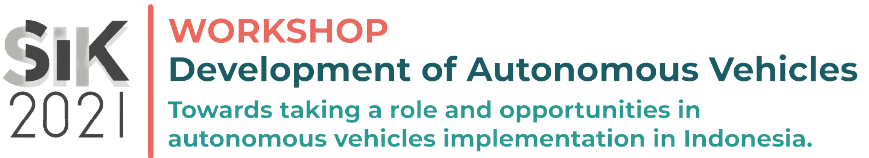

### Lower-level control system
----

This simulation notebook focused on speed and position control of DC Motor. Speed and position control act as lower-lever control system on Autonomous Vehicless. 

This simulation notebook prepared and presented on SIK 2021 Virtual Workshop, Development of Autonomous Vehicles. 

Supporting documents available on the github provided. 

References : A. Widyotriatmo. Dasar-dasar Mekatronika dan Robotika. Bandung:ITB Press, 2019.




### PID MOTOR DC (SPEED CONTROL NO LOAD)

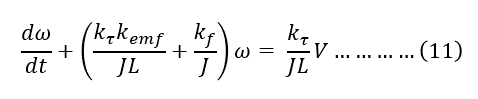

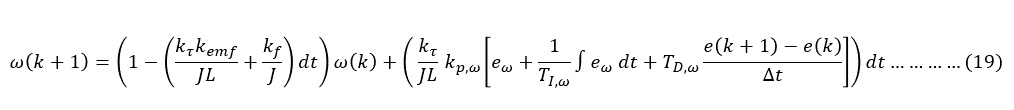

In [44]:
'''
Cell ini berisi variabel konstanta dari motor yang ditinjau 
beserta dengan parameter pengontrol PID
'''
# Motor constant
J = 0.45                      #Inersia rotor
k_emf = 0.12                  #Electromotive force constant
k_tau = 0.12                  #Motor torque constant
k_f = 0.068                   #Viscous friction constant
L = 0.05                      #Electric inductance
dt = 0.2                      #Time increment

# PID parameter
k_p = 0.01                    #Proportional constant
Ti = 0.1                      #Integral constant
Td = 0                        #Derivative constant

print("parameter updated!")

parameter updated!


Text(0.5, 1.0, 'control input vs time')

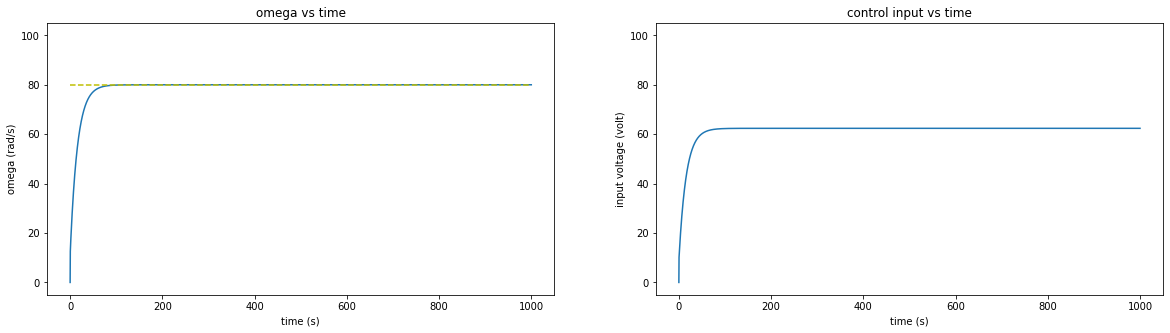

In [58]:
'''
Cell ini berisi perhitungan simulasi kontrol kecepatan angular berbasis PID pada motor DC 
beserta dengan proses plotting simulasi kontrol
'''
import matplotlib.pyplot as plt                                                           #import plotting library

# Simulation parameter
omegaref = 80                                                                             #Angular speed desired
omega = [0]                                                                               #Angular speed at t(0)
e_int = omegaref - omega[0]                                                               #Integral error at t(0)
e_dif = 0                                                                                 #Differential error at t(0)
sim_time = 5000                                                                           #Number of simulation loop
error = []                                                                                #initiate error variable
u = [0]                                                                                   #initialize control input

# Calculating in every time interval
time = [0]                                                                                #Initial time value
for k in range(sim_time) :                                                                #looping for desired simulation time 
  error.append(omegaref-omega[k])                                                         #calculating angular speed error
  e_int = e_int + (error[k]*dt)                                                           #calculating integral error
  e_dif = (error[k]-e_dif)/dt                                                             #calculating differential error                                                      
  u.append(k_p*(error[k]+(1/Ti)*e_int+Td*e_dif))                                          #calculating control input (PID)
  omega.append(((1-((k_tau*k_emf)/(J*L)+(k_f/J))*dt)*omega[k]+(k_tau/(J*L))*u[k+1])*dt)   #calculating omega
  e_dif = error[k]                                                                        #update differential error
  time.append(time[k]+dt)                                                                 #time update

# Control visualization
width = 20
height = 5
plt.figure(figsize=(width, height))

plt.subplot(121)
plt.plot(time, omega)
plt.plot([0, time[-1]], [80, 80], 'y--')                                                  
plt.plot(300,100)
plt.xlabel("time (s)")
plt.ylabel("omega (rad/s)")                                                               
plt.title("omega vs time")

plt.subplot(122)
plt.plot(time, u)                                                                         
plt.plot(300,100)    
plt.xlabel("time (s)")
plt.ylabel("input voltage (volt)")                                                        
plt.title("control input vs time")

### PID MOTOR DC (SPEED CONTROL WITH LOAD)

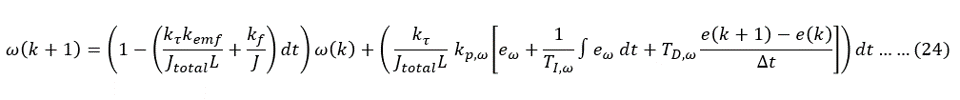

In [88]:
'''
Cell ini berisi variabel konstan untuk pembebanan yang diberikan pada motor DC
beserta dengan parameter pengontrol PID
'''
J_l = 4.422                   #Load inertia, no passenger
K_g = 5                       #Transmission gear ratio
J_tot = J + (J_l/(K_g^2))     #Total inertia
         
# PID parameter
k_p = 0.01                    #Proportional constant
Ti = 0.1                      #Integral constant
Td = 0                        #Derivative constant

print("parameter updated!")

parameter updated!


Text(0.5, 1.0, 'control input vs time')

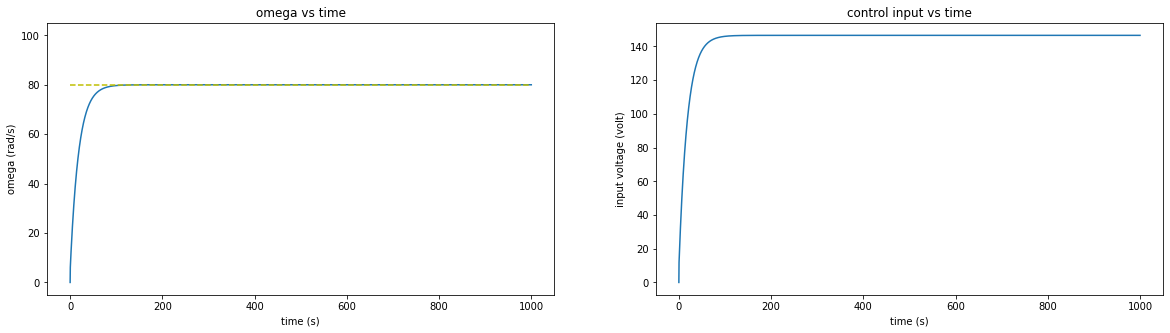

In [89]:
'''
Cell ini berisi perhitungan simulasi kontrol kecepatan angular berbasis PID pada motor DC dengan pembebanan
beserta dengan proses plotting simulasi kontrol
'''
import matplotlib.pyplot as plt                                                                                       #import plotting library

# Simulation parameter
omegaref = 80                                                                                                         #Angular speed desired
omega_load = [0]                                                                                                      #Angular speed at t(0)
e_int = omegaref - omega_load[0]                                                                                      #Integral error at t(0)
e_dif = 0                                                                                                             #Differential error at t(0)
sim_time = 5000                                                                                                       #Number of simulation loop
error = []                                                                                                            #initiate error variable
u_load = [0]                                                                                                          #initialize control input

# Calculating in every time interval
time = [0]                                                                                                            #Initial time value
for k in range(sim_time) :                                                                                            #looping for desired simulation time 
  error.append(omegaref-omega_load[k])                                                                                #calculating angular speed error
  e_int = e_int + (error[k]*dt)                                                                                       #calculating integral error
  e_dif = (error[k]-e_dif)/dt                                                                                         #calculating differential error                                                      
  u_load.append(k_p*(error[k]+(1/Ti)*e_int+Td*e_dif))                                                                 #calculating control input (PID)
  omega_load.append(((1-((k_tau*k_emf)/(J_tot*L)+(k_f/J_tot))*dt)*omega_load[k]+(k_tau/(J_tot*L))*u_load[k+1])*dt)    #calculating omega
  e_dif = error[k]                                                                                                    #update differential error
  time.append(time[k]+dt)                                                                                             #time update

# Control visualization
width = 20
height = 5
plt.figure(figsize=(width, height))

plt.subplot(121)
plt.plot(time, omega_load)
plt.plot([0, time[-1]], [80, 80], 'y--')                                                  
plt.plot(300,100)
plt.xlabel("time (s)")
plt.ylabel("omega (rad/s)")                                                               
plt.title("omega vs time")

plt.subplot(122)
plt.plot(time, u_load)                                                                         
plt.plot(300,100)    
plt.xlabel("time (s)")
plt.ylabel("input voltage (volt)")                                                        
plt.title("control input vs time")

Text(0.5, 1.0, 'control input vs time')

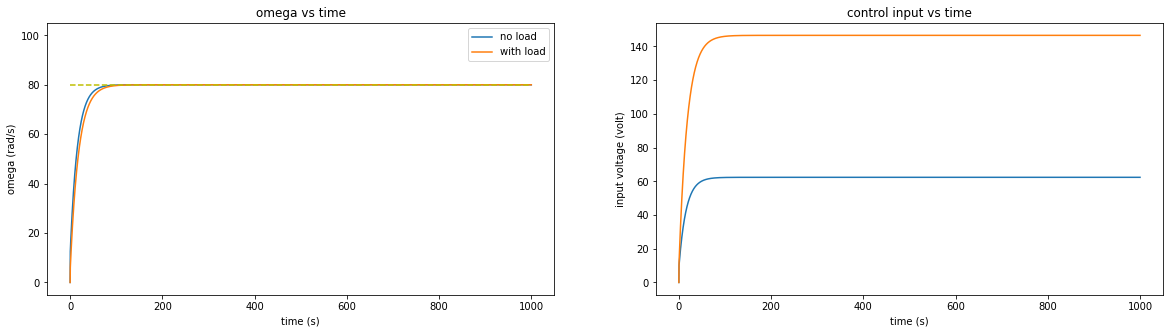

In [90]:
'''
Cell ini berisi komparasi grafik dari kontrol PID motor DC dengan dan tanpa pembebanan
'''
import matplotlib.pyplot as plt 

width = 20
height = 5
plt.figure(figsize=(width, height))

plt.subplot(121)
plt.plot(time, omega, label='no load')
plt.plot(time, omega_load, label='with load')
plt.plot([0, time[-1]], [80, 80], 'y--')                                                  
plt.plot(300,100)
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("omega (rad/s)")                                                               
plt.title("omega vs time")

plt.subplot(122)
plt.plot(time, u, label='no load')
plt.plot(time, u_load, label='with load')                                                                        
plt.plot(300,100)    
plt.xlabel("time (s)")
plt.ylabel("input voltage (volt)")                                                        
plt.title("control input vs time")

### PID Motor DC (Position)

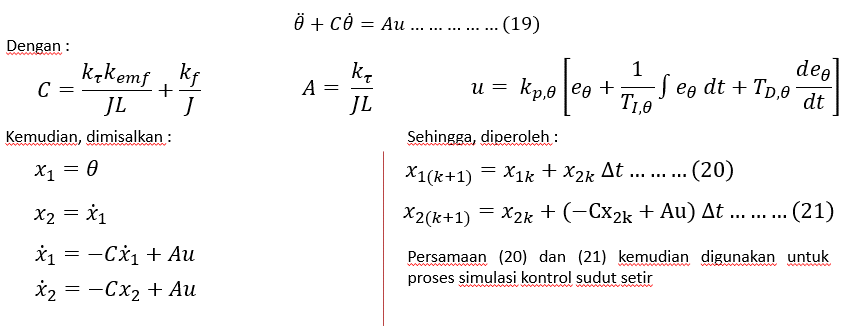

In [102]:
'''
Cell ini berisi variabel konstanta dari motor yang ditinjau 
beserta dengan parameter pengontrol PID
'''
# Motor constant
J = 0.45                      #Inersia rotor
k_emf = 0.12                  #Electromotive force constant
k_tau = 0.12                  #Motor torque constant
k_f = 0.068                   #Viscous friction constant
L = 0.05                      #Electric inductance

# PID parameter
k_p = 0.09                    #Proportional constant
Ti = 50                       #Integral constant
Td = 0                        #Derivative constant

print("parameter updated!")

parameter updated!


Text(0.5, 1.0, 'control input vs time')

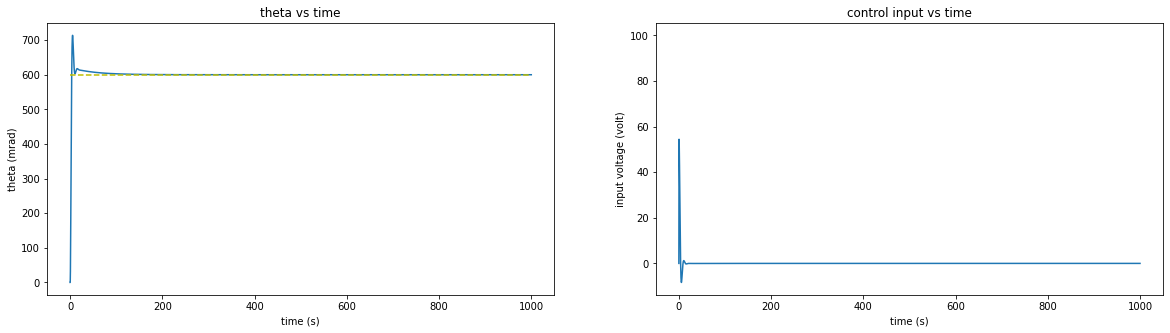

In [107]:
'''
Cell ini berisi perhitungan simulasi kontrol kecepatan angular berbasis PID pada motor DC 
beserta dengan proses plotting simulasi kontrol
'''
import matplotlib.pyplot as plt                                                                                   #import plotting library

# Simulation parameter
theta_ref = 600                                                                                                   #Position (angle) desired - mRad
theta = [0]                                                                                                       #position value
theta_dot = [0]                                                                                                   #initial value of theta dot
e_int = 0                                                                                                         #Integral error at t(0)
e_dif = 0                                                                                                         #Differential error at t(0)
sim_time = 5000                                                                                                   #Number of simulation loop
error = []                                                                                                        #initiate error variable
u_pos = [0]                                                                                                       #initialize control input
dt = 0.2                                                                                                          #Time increment

# Calculating in every time interval
time = [0]                                                                                                        #Initial time value
for k in range(sim_time) :                                                                                        #looping for desired simulation time 
  error.append(theta_ref-theta[k])                                                                                #calculating angular speed error
  e_int = e_int + (error[k]*dt)                                                                                   #calculating integral error
  e_dif = (error[k]-e_dif)/dt                                                                                     #calculating differential error                                                      
  u_pos.append(k_p*(error[k]+(1/Ti)*e_int+Td*e_dif))                                                              #calculating control input (PID)
  theta.append(theta[k]+theta_dot[k]*dt)                                                                          #calculating omega  
  theta_dot.append(theta_dot[k]+(-((((k_tau*k_emf)/(J*L))+(k_f/J))*theta_dot[k])+((k_tau/(J*L))*u_pos[k+1]))*dt)  #theta_dot calculation      
  e_dif = error[k]                                                                                                #update differential error
  time.append(time[k]+dt)                                                                                         #time update

# Control visualization
width = 20
height = 5
plt.figure(figsize=(width, height))

plt.subplot(121)
plt.plot(time, theta)
plt.plot([0, time[-1]], [600, 600], 'y--')                                                  
plt.plot(800,100)
plt.xlabel("time (s)")
plt.ylabel("theta (mrad)")                                                               
plt.title("theta vs time")

plt.subplot(122)
plt.plot(time, u_pos)                                                                         
plt.plot(300,100)    
plt.xlabel("time (s)")
plt.ylabel("input voltage (volt)")                                                        
plt.title("control input vs time")